In [3]:
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
import pandas as pd

In [2]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811643 sha256=4ad9ed68c77716431a10d8014958ee9f174a805132ef50fa33715f963a083d81
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


# **Dataset preparation**

In [4]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


# **SVD Algorithm**

In [5]:
algo1 = SVD()
result = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVD_result = pd.DataFrame.from_dict(result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9333  0.9367  0.9422  0.9332  0.9403  0.9371  0.0036  
MAE (testset)     0.7361  0.7382  0.7408  0.7351  0.7414  0.7383  0.0025  
Fit time          1.76    1.44    1.33    1.32    1.35    1.44    0.16    
Test time         0.26    0.17    0.14    0.14    0.15    0.17    0.04    


# **SVD pp Algorithm**

In [6]:
algo2 = SVDpp()
result = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVDpp_result = pd.DataFrame.from_dict(result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9208  0.9198  0.9240  0.9140  0.9188  0.9195  0.0033  
MAE (testset)     0.7235  0.7222  0.7250  0.7169  0.7195  0.7214  0.0029  
Fit time          31.01   26.75   26.38   27.51   26.20   27.57   1.78    
Test time         4.67    4.09    4.17    5.56    4.28    4.56    0.54    


# **NMF Algorithm**

In [7]:
algo3 = NMF()
result = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
NMF_result = pd.DataFrame.from_dict(result).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9617  0.9618  0.9589  0.9667  0.9740  0.9646  0.0053  
MAE (testset)     0.7538  0.7581  0.7543  0.7603  0.7661  0.7585  0.0045  
Fit time          2.04    2.07    2.04    2.58    2.15    2.18    0.21    
Test time         0.12    0.38    0.13    0.36    0.12    0.22    0.12    


# **Final comparison**

In [8]:
Final_comparison = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])

In [9]:
Final_comparison['SVD'] = SVD_result
Final_comparison['SVDpp'] = SVDpp_result
Final_comparison['NMF'] = NMF_result

In [10]:
Final_comparison

,SVD,SVDpp,NMF
test_rmse,0.937128,0.919451,0.964623
test_mae,0.738318,0.721419,0.758546
fit_time,1.440702,27.571139,2.175808
test_time,0.172916,4.555466,0.221829


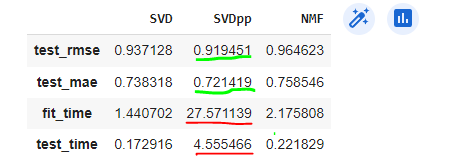

As we can see in the comparison table SVDpp algo takes significantly more time to process the data in comparison with other algorythms, but it gaves us the most accurate result among others. SVP algo looks like the most optimal one considering accuracy and time.